In [3]:
import os
import avstack
import avapi
import numpy as np
import quaternion

%load_ext autoreload
%autoreload 2

obj_data_dir_k = '/data/KITTI/object'
raw_data_dir_k = '/data/KITTI/raw'

KOD = avapi.kitti.KittiObjectDataset
KRD = avapi.kitti.KittiRawDataset(raw_data_dir_k)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Convert raw dataset instance to the "object" format
idx_date = 0
idx_seq = 2
exp_path = KRD.convert_sequence(KRD.get_available_dates()[idx_date], idx_seq=idx_seq,
                                max_frames=None, max_time=None, tracklets_req=True)
print(f'\nRaw data has been converted to object format and saved at {exp_path}')
KDM = KOD(obj_data_dir_k, exp_path)

copying image data...
copying lidar data...
copying calibration data...
copying label data...
parsing tracklet file /data/KITTI/raw/2011_09_26/2011_09_26_drive_0005_sync/tracklet_labels.xml
file contains 15 tracklets
loaded 15 tracklets
copying timestamp data...
writing imageset file...
done copying data! - sequence contains 154 files

Raw data has been converted to object format and saved at /data/KITTI/object/2011_09_26_drive_0005_sync


## Test Visualization

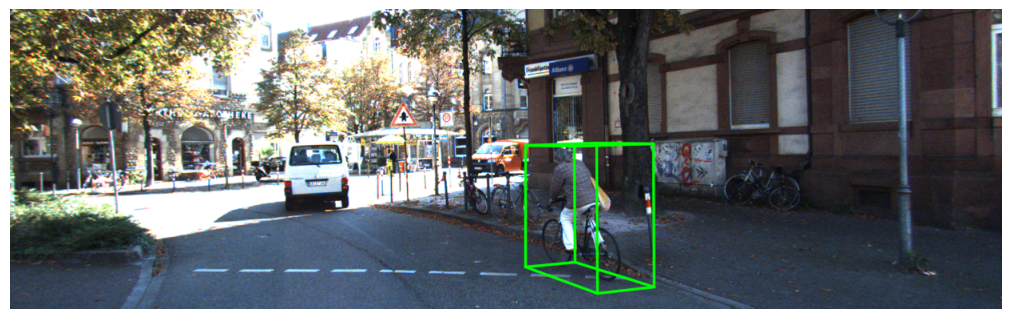

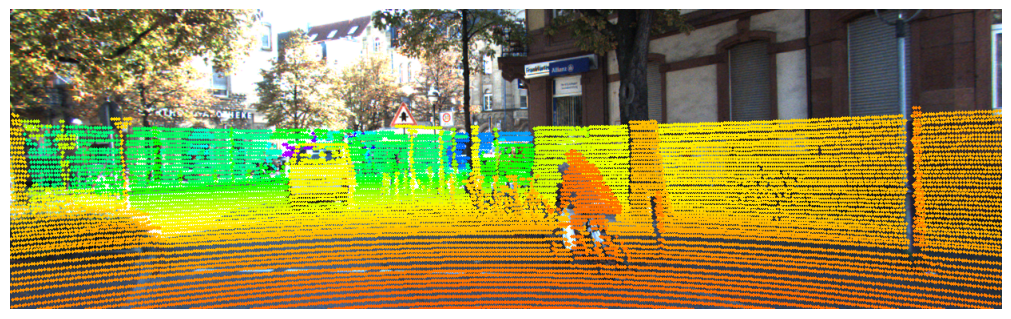

In [5]:
# Single frame visualization
frame = KDM.frames[30]
img = KDM.get_image(frame, sensor='image-2')
pc = KDM.get_lidar(frame)
objects = KDM.get_objects(frame)
avapi.visualize.snapshot.show_objects_on_image(img, objects, projection='3d', inline=True)
avapi.visualize.snapshot.show_lidar_on_image(pc, img)

## Test Detection

In [ ]:
model = '3d-lidar'
if model == '2d-img':
    M = avstack.modules.perception.object2dfv.MMDetObjectDetector2D(
        model='fasterrcnn', dataset='kitti', gpu=1)
elif model == '3d-img':
    M = avstack.modules.perception.object3d.MMDetObjectDetector3D(
        model='pgd', dataset='kitti', gpu=0)
elif model == '3d-lidar':
    M = avstack.modules.perception.object3d.MMDetObjectDetector3D(
        model='pointpillars', dataset='kitti', gpu=1)
else:
    raise NotImplementedError(model)

In [ ]:
frame = KDM.frames[150]
img = KDM.get_image(frame, sensor='image-2')
pc = KDM.get_lidar(frame)
objects = KDM.get_objects(frame)

if model == '2d-img':
    outputs = M(img, identifier='test', frame=frame)
elif model == '3d-img':
    outputs = M(img, identifier='test', frame=frame)
elif model == '3d-lidar':
    outputs = M(pc, identifier='test', frame=frame)
else:
    raise NotImplementedError(model)
avapi.visualize.snapshot.show_image_with_boxes(img, outputs.data, inline=True)